# Music Recommender System 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import missingno as ms
import os
import random

In [2]:
#for accsess data
from google.colab import files
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import warnings
warnings.filterwarnings('ignore')

**Working on dataset kaggle_visible_evaluation_triplets.txt**




In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/data/kaggle_visible_evaluation_triplets.txt',sep='\t', names=['user_id','song_id','freq'])

In [5]:
df.head()


,user_id,song_id,freq
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1


In [6]:
df['song_id'].nunique()

163206

if we observed here there are 1,63,206 unique number of songs in triplets file

In [7]:
df['user_id'].nunique()

110000

there are 1,10,000 unique users are observed here in triplets file

In [8]:
df.shape

(1450933, 3)

In [9]:
dup=df.duplicated()
sum(dup)
# there are no duplictes in triplets file

0

In [10]:
print(sum(df.isnull().any())) # no null values are observed

0


**working on 2 dataset unique.txt**

In [11]:
df1=pd.read_csv("/content/gdrive/MyDrive/data/unique_tracks.txt",sep='<SEP>',names=['track_id','song_id','artist_name','release']) 
df1=df1.drop(['track_id'],axis=1)
df1.shape

(1000000, 3)

### **10L unique tracks are observed in uniquqe_tracks file and here we drop the column track_id**

In [12]:
df1.head()

,song_id,artist_name,release
0,SOQMMHC12AB0180CB8,Faster Pussy cat,Silent Night
1,SOVFVAK12A8C1350D9,Karkkiautomaatti,Tanssi vaan
2,SOGTUKN12AB017F4F1,Hudson Mohawke,No One Could Ever
3,SOBNYVR12A8C13558C,Yerba Brava,Si Vos Querés
4,SOHSBXH12A8C13B0DF,Der Mystic,Tangle Of Aspens


In [13]:
df1['song_id'].nunique()

999056

9,99,056 number of unique songs are available in unique_tracks file

**merging df and df1 on the bisis of "song_id"**.
it means that if song_id of df is present in df1 then only there will be merege if not then next song_id will select and same condtion will on that also. for help see the image.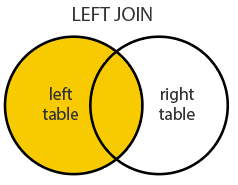

In [14]:
df_final = pd.merge(df, df1.drop_duplicates(['song_id']), on='song_id',how='left')
df_final.head(10)

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
5,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOXLOQG12AF72A2D55,1,Beastie Boys,Unite (2009 Digital Remaster)
6,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUVUHC12A67020E3B,1,Moby,Lift Me Up
7,d7083f5e1d50c264277d624340edaaf3dc16095b,SOUQERE12A58A75633,1,Guano Apes,Living In A Lie
8,d7083f5e1d50c264277d624340edaaf3dc16095b,SOIPJAX12A8C141A2D,1,Guano Apes,Open Your Eyes
9,d7083f5e1d50c264277d624340edaaf3dc16095b,SOEFCDJ12AB0185FA0,2,UDG,Kurtizana


here we merged the both the datasets according to the user_id matched song, it should merge only with respect to user listened songs in unique_tracks file, so here we dropped the duplicates, which removes similar identified rows 

In [15]:
df_final.shape

(1450933, 5)

In [16]:
print(sum(df_final.isnull().any()))

1


**there is one null value we will find it in which col there is null.**

In [17]:
np.where(df_final['release'].isnull())[0]

array([192828])

**at row index 192828 there is null value now we will find col **

In [18]:
df_final.iloc[[192828]]

,user_id,song_id,freq,artist_name,release
192828,7b3a62a418862aefc4b3d85feb191fa0fd752c69,SOZDBDL12AB018AFFF,1,Sébastien Roch,NaN


**we have found out that in the release there is nan value.now we will find any artist named as 'Sébastien Roch' has any release or not. if not then we will drop it.**

In [19]:
np.where(df_final['artist_name']=='Sébastien Roch')

(array([192828]),)

**there is not any release for 'Sébastien Roch' so we will delete the row 192828.**

In [20]:
df_final=df_final.drop(labels=192828, axis=0)

In [21]:
print(sum(df_final.isnull().any()))

0


In [22]:
df_final.shape

(1450932, 5)

In [23]:
dup3=df_final.duplicated()
sum(dup3)

0

In [24]:
print('total datapoints',df_final.shape[0])
print('total number of user',df_final['user_id'].unique().shape[0])
print('total number of songs',df_final['song_id'].unique().shape[0])

total datapoints 1450932
total number of user 110000
total number of songs 163205


In [25]:
print('total number of release',df_final['release'].unique().shape[0])
print('total number of artist',df_final['artist_name'].unique().shape[0])

total number of release 137622
total number of artist 28360


In [26]:
df_final.describe()

,freq
count,1.450932e+06
mean,3.187151e+00
std,7.051666e+00
min,1.000000e+00
25%,1.000000e+00
50%,1.000000e+00
75%,3.000000e+00
max,9.230000e+02


In [27]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1450932 entries, 0 to 1450932
Data columns (total 5 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   user_id      1450932 non-null  object
 1   song_id      1450932 non-null  object
 2   freq         1450932 non-null  int64 
 3   artist_name  1450932 non-null  object
 4   release      1450932 non-null  object
dtypes: int64(1), object(4)
memory usage: 66.4+ MB


In [28]:
df_final.columns

Index(['user_id', 'song_id', 'freq', 'artist_name', 'release'], dtype='object')

Text(0, 0.5, 'Song ID')

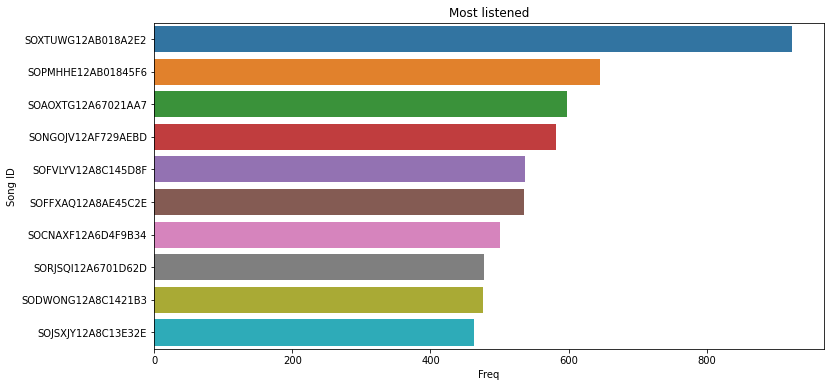

In [29]:
freq=df_final.sort_values('freq',ascending=False)
plt.figure(figsize=(12,6))
ax=sns.barplot(x=freq['freq'].head(15), y=freq['song_id'].head(10), data=freq)
plt.title('Most listened')
plt.xlabel('Freq')
plt.ylabel('Song ID')

**We have found that a song_id SOXTUWG12AB018A2E2 is most time played. Now, we will find song and artist.**

In [30]:
np.where(df_final['song_id']=='SOXTUWG12AB018A2E2')

(array([1449166]),)

In [31]:
df_final.iloc[[1449166]]

,user_id,song_id,freq,artist_name,release
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


**By this anlysis, we can find that artist name='Kilgore' and realase='Drop The Hammer (Album Version)' is most palyed by a crzay user whose user_id is='22bb29714137fa47083963c30e1a26f1bf517e7d' palyed this song 923 times** 

**in the continuation of this analysis we are going to find 5 most crazy users and there crzay choice song.**

In [32]:
most_played_song_by_one_user=df_final['freq'].value_counts().tail(5)
most_played_song_by_one_user

262    1
187    1
259    1
189    1
923    1
Name: freq, dtype: int64

In [33]:
#print(df_final[(df_final.freq==923)])
#print(df_final[(df_final.freq==262)])
#print(df_final[(df_final.freq==259)])
print(df_final[(df_final.freq==189)])
df_final[(df_final.freq==187)]

                                         user_id  ...                        release
311739  efd470cc7311509e0bd24c5510262d80bc95eb54  ...  Unite (2009 Digital Remaster)

[1 rows x 5 columns]


,user_id,song_id,freq,artist_name,release
927480,ccf9db671153c78301f2fc2fe7dd9df9aa7f8a30,SOTFIPT12A6701F2FA,187,Red Hot Chili Peppers,Fortune Faded (Album Version)


**The top most 5 crazy users who have played their favt song in crazy way** 

1.   22bb29714137fa47083963c30e1a26f1bf517e7d
2.   70c9faa9bf2149c6ea98cf3a099077971fe6e9b9
3.   d4da4dc045d2a9ad7e55f266e627e6096325a678
4.   efd470cc7311509e0bd24c5510262d80bc95eb54
5.   ccf9db671153c78301f2fc2fe7dd9df9aa7f8a30



In [34]:
df_final[df_final['freq']>=500] # this cell had the info about the songs with greater than 500 listened times
                                # there are only 7 users who had listened their favourite songs with more than or equal to 500 times

,user_id,song_id,freq,artist_name,release
178584,fa82c0a1a93b7c52870d7b0a004b444bbdf19401,SOCNAXF12A6D4F9B34,500,Alliance Ethnik,Creil City
363980,9d12c30de5d9975f621f95f512699989ac544410,SOFFXAQ12A8AE45C2E,535,Fear My Thoughts,Death Chamber
471133,2d9ea6058d0872ccdc5b1c5c685758bb9c55f0a3,SOAOXTG12A67021AA7,597,Ms. Dynamite / Kymani Marley,Seed Will Grow
642730,a86e68128c6a48d3392db22ce1151a3bdccf5fcf,SOFVLYV12A8C145D8F,537,Us3,Believe In Yourself
838445,a1cc4d088600df2db42e6a305974675ffe8c905d,SOPMHHE12AB01845F6,646,The Beach Boys,What Is a Young Girl Made of
1297745,69ad6b6a1d14d740eb8c2f013a19c1f8048cecde,SONGOJV12AF729AEBD,582,Queen,Somebody To Love
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)


In [35]:
df_final[df_final['freq']>=100]

,user_id,song_id,freq,artist_name,release
4043,ab8218336efff9f880d3a0e24b53a7aa7ebbf4b6,SOJSXJY12A8C13E32E,125,Clara Hill,Clara meets Slope - Hard To Say
5056,96deca47a75bb70478c086f435426485d575746a,SOFTZUB12AB0188C67,150,Kruder & Dorfmeister,High Noon
5064,96deca47a75bb70478c086f435426485d575746a,SOOFEHM12A8AE457B4,241,Kylie Minogue,Confide In Me
5068,96deca47a75bb70478c086f435426485d575746a,SOPGFGG12A8C136E3A,214,LU,Por Besarte
9376,8463ade505658a6f70e9cfaa948b3b8515e18072,SOFGTEF12AB0185FF9,126,Chris Stills,Lucifer & Jane (LP Version)
...,...,...,...,...,...
1447287,ab979b06c4f6230267e66c6cb64e5d0ea24fc1ea,SOVALCK12A8C13C1F7,139,JK,You & I
1447541,4b4ff0c1b288b1b33a2e5f5cc9ce534a3a4446de,SOAWUML12A6D4F3FE1,121,Ziggy Marley And The Melody Makers,This One
1449167,22bb29714137fa47083963c30e1a26f1bf517e7d,SOXTUWG12AB018A2E2,923,Kilgore,Drop The Hammer (Album Version)
1449384,89058561f2d633baf415db0ac35aefedd0e4378c,SOBONKR12A58A7A7E0,111,Dwight Yoakam,You're The One


In [36]:
df_final[df_final['freq']>=100]['song_id'].nunique()
#there are 761 unique songs users listen each song more than or equal to 100 times

761

In [37]:
df_final[df_final['freq']>=100]['song_id'].unique()
#these are the 761 unique songs that users listen each song more than or equal to 100 times

array(['SOJSXJY12A8C13E32E', 'SOFTZUB12AB0188C67', 'SOOFEHM12A8AE457B4',
       'SOPGFGG12A8C136E3A', 'SOFGTEF12AB0185FF9', 'SOKENKR12AB01828F7',
       'SOAUWYT12A81C206F1', 'SOTFCUM12A6D4F7D0B', 'SOEPDNA12AC3DF9820',
       'SOZVILY12AB01855ED', 'SOYBLYP12A58A79D32', 'SOSYLXK12A8C13F738',
       'SOQLHST12AB0184A27', 'SOMMONH12A6D4F41CD', 'SOLGLUC12AB018A8FA',
       'SOIKQFR12A6310F2A6', 'SOPUCYA12A8C13A694', 'SOJYISZ12A8C135F5A',
       'SODLLYS12A8C13A96B', 'SOOWXAQ12AB0188996', 'SOTEGWG12AB01897AC',
       'SOUNJIO12AB0181339', 'SOSJRJP12A6D4F826F', 'SONQCXC12A6D4F6A37',
       'SOMGVYU12A8C1314FF', 'SOHPOMX12A58A7D506', 'SOBVCRB12A8C139012',
       'SOTRQKZ12AB018E90B', 'SOIZFTE12AB0186842', 'SOMOFOP12AB01825DD',
       'SOUVNUS12A8C14566E', 'SOQZQTH12AB0189AB8', 'SOACBLB12AB01871C7',
       'SOZCDWG12A6D4F81E1', 'SOYXUDL12A582A2695', 'SONPZTQ12A8C13865E',
       'SORIWEH12A8C13D4A6', 'SOEGIYH12A6D4FC0E3', 'SOMXSTV12AB018AA6E',
       'SOWAHLO12A8C13BB33', 'SOXJFKD12A3F1EA31A', 

In [38]:
df_final[df_final['freq']>=100]['user_id'].nunique() 
# there are 793 users who listens some songs more than or equal to 100 times

793

In [39]:
df_final[df_final['freq']<=1] 
# this is the list of 1 time listened songs

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero
...,...,...,...,...,...
1450916,fc072bde2043756ea30ff07e4a5311e34825b4df,SORSIEU12AB017DCEC,1,Chris Rea,Speed
1450920,fc072bde2043756ea30ff07e4a5311e34825b4df,SOOMYKI12A8C13943C,1,L.S.G.,Into Deep (Clubmix 2)
1450922,fc072bde2043756ea30ff07e4a5311e34825b4df,SOBOVYQ12A6D4F7CBA,1,Los Delinqüentes,Ya Nadie Te Quiere
1450926,5e650759ebf89012044c6d52121eeada8b0ec814,SODCNJX12A6D4F93CB,1,Natiruts,Jamaica Roots II(Agora E Sempre)


In [40]:
(df_final.groupby(by=['artist_name']).count()>1000).value_counts()
# there are 213 artists whose songs had greater than 1000 users

user_id  song_id  freq   release
False    False    False  False      28147
True     True     True   True         213
dtype: int64

In [41]:
df_final.artist_name.nunique() # there are 28,361 unique artists are available

28360

In [42]:
df_final.groupby(by=['artist_name']).count() 

,user_id,song_id,freq,release
artist_name,,,,
!!!,109,109,109,109
!Deladap,3,3,3,3
& And Oceans,2,2,2,2
'68 Comeback,22,22,22,22
'N Sync/Phil Collins,48,48,48,48
...,...,...,...,...
Étienne Daho,45,45,45,45
Íon,5,5,5,5
Ólafur Arnalds,78,78,78,78


In [43]:
df_final[df_final['artist_name']=='!!!'] # this is an abnormal activity which doesn't have any artist name for 109 rows

,user_id,song_id,freq,artist_name,release
23550,6de4f2710a3cf3138394d931215224efac265abf,SORLTDE12A6D4F5705,1,!!!,Must Be The Moon
82235,f6587207cba5d685999b650bb7b7701bacbb3c5d,SOKCVIN12A6D4F5709,2,!!!,Yadnus
89231,3b0eb941d6d0f8b6236f23be34810de9e5de5e87,SOESDGT12A6D4F570A,4,!!!,Bend Over Beethoven
97981,0de845be9e6514cfe5212c4615cb35e2aa0839ce,SOYHNTG12A6D4F5703,1,!!!,Myth Takes
106522,3a280d1855a284a73aa4275699456a1f7aa1303b,SOGRWKZ12A6D4F5708,1,!!!,Sweet Life
...,...,...,...,...,...
1408452,1b70a8a5ab97f9d92e183bd424ca87eaef6cb560,SOGRWKZ12A6D4F5708,6,!!!,Sweet Life
1410178,20f28480a33300f770a289f485f6f7e03a6a0277,SOGRWKZ12A6D4F5708,1,!!!,Sweet Life
1426426,0a5ce21d67387f5718334f75b60e2ce8b9169fee,SOYHNTG12A6D4F5703,1,!!!,Myth Takes
1426427,0a5ce21d67387f5718334f75b60e2ce8b9169fee,SOYDOCQ12A6D4F570B,1,!!!,Break In Case Of Anything


In [44]:
df_final.freq.mean(),df_final.freq.max(),df_final.freq.min(),df_final.freq.median(),df_final.freq.std()
# this cell had info for freq with its mean, max, min, medin, standard deviation values

(3.187150741730143, 923, 1, 1.0, 7.0516658158527985)

**in the continuation we will find most played song by all user.**

In [45]:
df_final['release'].value_counts().head(5)

Sehr kosmisch                     5043
Undo                              4483
You're The One                    4270
Dog Days Are Over (Radio Edit)    3780
Revelry                           3672
Name: release, dtype: int64

**now lets find most played song's artist.**

In [46]:
df_final[(df_final.release == 'Sehr kosmisch')] # there are 5043 users for this artist and the song

,user_id,song_id,freq,artist_name,release
22,d68dc6fc25248234590d7668a11e3335534ae4b4,SOFRQTD12A81C233C0,1,Harmonia,Sehr kosmisch
366,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOFRQTD12A81C233C0,2,Harmonia,Sehr kosmisch
455,bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca,SOFRQTD12A81C233C0,11,Harmonia,Sehr kosmisch
564,6493c305190b52657d4ea3f4adf367ffcf3427af,SOFRQTD12A81C233C0,3,Harmonia,Sehr kosmisch
693,a5d92e23cf3f711dfc473f1c3b296492ec02effd,SOFRQTD12A81C233C0,7,Harmonia,Sehr kosmisch
...,...,...,...,...,...
1448701,f884ce6c56be78242d7d39b03856a6ec35ca0b7c,SOFRQTD12A81C233C0,6,Harmonia,Sehr kosmisch
1449061,cb7711f1f28de9a2873a026bab8f246198fed24f,SOFRQTD12A81C233C0,8,Harmonia,Sehr kosmisch
1449731,67bdd623ade703d9ab2f99e6e7a37c0d921fef0a,SOFRQTD12A81C233C0,4,Harmonia,Sehr kosmisch
1450521,bfda9b649c891832d18e416ade1fc554ba11dd19,SOFRQTD12A81C233C0,5,Harmonia,Sehr kosmisch


**we can find "harmonia" is most played artist for a single song and listened by 5043 unique users**

**now in contious we will find which user have played this song most. "sehr kosmisch" by harmoia.**

In [47]:
pop_song=df_final[df_final['song_id']=='SOFRQTD12A81C233C0'] 
pop_song  

,user_id,song_id,freq,artist_name,release
22,d68dc6fc25248234590d7668a11e3335534ae4b4,SOFRQTD12A81C233C0,1,Harmonia,Sehr kosmisch
366,c732f882aa8d6db3bfaf8037d6418f27d3e07fc8,SOFRQTD12A81C233C0,2,Harmonia,Sehr kosmisch
455,bdbf8ddd82fa83ef4538a15298dfca19bfc4a3ca,SOFRQTD12A81C233C0,11,Harmonia,Sehr kosmisch
564,6493c305190b52657d4ea3f4adf367ffcf3427af,SOFRQTD12A81C233C0,3,Harmonia,Sehr kosmisch
693,a5d92e23cf3f711dfc473f1c3b296492ec02effd,SOFRQTD12A81C233C0,7,Harmonia,Sehr kosmisch
...,...,...,...,...,...
1448701,f884ce6c56be78242d7d39b03856a6ec35ca0b7c,SOFRQTD12A81C233C0,6,Harmonia,Sehr kosmisch
1449061,cb7711f1f28de9a2873a026bab8f246198fed24f,SOFRQTD12A81C233C0,8,Harmonia,Sehr kosmisch
1449731,67bdd623ade703d9ab2f99e6e7a37c0d921fef0a,SOFRQTD12A81C233C0,4,Harmonia,Sehr kosmisch
1450521,bfda9b649c891832d18e416ade1fc554ba11dd19,SOFRQTD12A81C233C0,5,Harmonia,Sehr kosmisch


In [48]:
pop_song.max()

user_id        ffedd3bea08f4ef2c7e5df5821b5e79ef2ca6ae5
song_id                              SOFRQTD12A81C233C0
freq                                                135
artist_name                                    Harmonia
release                                   Sehr kosmisch
dtype: object

**hence we have find the user "ffedd3bea08f4ef2c7e5df5821b5e79ef2ca6ae5" has plyed the song( "sehr kosmisch" by harmoia.) most time(135). see also in graph**

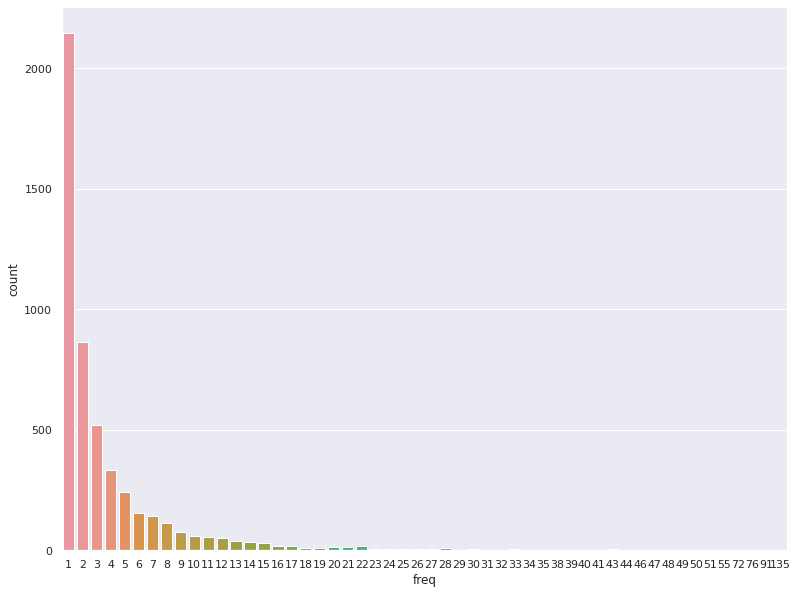

In [49]:
sns.set(rc={'figure.figsize':(13,10)})
sns.countplot(pop_song['freq'])

**In the contious, we will find most active user.**

In [50]:
most_user=df_final['user_id'].value_counts().head(5)
most_user

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
Name: user_id, dtype: int64

**in the continuation we will find most palyed artist.**

In [51]:
df_final['artist_name'].value_counts().head(5)

Coldplay                  12279
Kings Of Leon              8514
Florence + The Machine     8213
Justin Bieber              7669
Jack Johnson               6784
Name: artist_name, dtype: int64

**In the continuation, we will find the coldplay artist's most played songs.**

In [52]:
data_Coldplay = df_final[(df_final.artist_name == 'Coldplay')]
data_Coldplay

,user_id,song_id,freq,artist_name,release
122,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOPXKYD12A6D4FA876,6,Coldplay,Yellow
336,248378ac27e1745d6a9d59392b7dc5b02a6186a6,SOKLRPJ12A8C13C3FE,1,Coldplay,The Scientist
353,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOWEJXA12A6701C574,5,Coldplay,Fix You
360,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOKLRPJ12A8C13C3FE,2,Coldplay,The Scientist
365,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOPXKYD12A6D4FA876,3,Coldplay,Yellow
...,...,...,...,...,...
1450525,b98e6137741a5ed1ffd03d81e0ade159ba4eeeeb,SOKLRPJ12A8C13C3FE,2,Coldplay,The Scientist
1450545,b98e6137741a5ed1ffd03d81e0ade159ba4eeeeb,SOUKJBT12A6701C4D6,3,Coldplay,Speed Of Sound
1450651,32d65b81f82874077bd978fa129eff63a43e96f9,SOPXKYD12A6D4FA876,2,Coldplay,Yellow
1450655,32d65b81f82874077bd978fa129eff63a43e96f9,SOSVPIE12A6D4FA873,1,Coldplay,Shiver


In [53]:
data_Coldplay['release'].value_counts().head(5)

The Scientist    1675
Clocks           1500
Yellow           1299
Fix You          1033
In My Place       531
Name: release, dtype: int64

In [54]:
data_Coldplay.song_id.nunique() # 76 songs are sung by codplay

76

In [55]:
data_Coldplay.freq.max() # a song by coldplay had highest frequency of 261

261

In [56]:
data_Coldplay[data_Coldplay['freq']==261] # we can observe here info about highes listened song by coldplay artist

,user_id,song_id,freq,artist_name,release
558905,6a048c2e7fe977abb52aff4c43889f2819788c54,SOPXKYD12A6D4FA876,261,Coldplay,Yellow


In [57]:
cold_freq=df_final[df_final['song_id']=='SOPXKYD12A6D4FA876'] # there are 1299 users listened the most popular song by coldplay
cold_freq

,user_id,song_id,freq,artist_name,release
122,e9dc6b4c2b22aa6dc8260e1963021567728055b2,SOPXKYD12A6D4FA876,6,Coldplay,Yellow
365,6530c4fc41b9110de5d39fe0355fa103c66385f0,SOPXKYD12A6D4FA876,3,Coldplay,Yellow
1642,36a35718d262b62cf00f038d76c4920912501b8a,SOPXKYD12A6D4FA876,5,Coldplay,Yellow
1794,071fd3aabca95437e6c390938ec79ad9ca4f3ece,SOPXKYD12A6D4FA876,2,Coldplay,Yellow
5053,6ad224a05378c6614ea08019a9494ee811d6c7e0,SOPXKYD12A6D4FA876,4,Coldplay,Yellow
...,...,...,...,...,...
1442468,60318fb458930606b80edbc190ea57609c818d44,SOPXKYD12A6D4FA876,1,Coldplay,Yellow
1443009,2ee1adf0cdac5444af8c9186e5e3d432abcbea43,SOPXKYD12A6D4FA876,4,Coldplay,Yellow
1445129,4b9cabf788964a5668be6b05986a7cd1056f28e8,SOPXKYD12A6D4FA876,1,Coldplay,Yellow
1449505,32d1d1dc07de0f6e46495d98243ce412d705efda,SOPXKYD12A6D4FA876,4,Coldplay,Yellow


In [58]:
cold_freq.freq.sum() # total 3,879 times the popular song of coldplay is listened by 1299 users

3879

**The above songs are most palyed song of our most played artist (coldplay)**

In [59]:
df_final['artist_name'].value_counts().tail(5)

Mark Mulcahy         1
Icewater             1
Rowland S Howard     1
Wally Badarou        1
Elegant Machinery    1
Name: artist_name, dtype: int64

**By the above analysis, we can find that user that have only one release.**



[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Freq')]

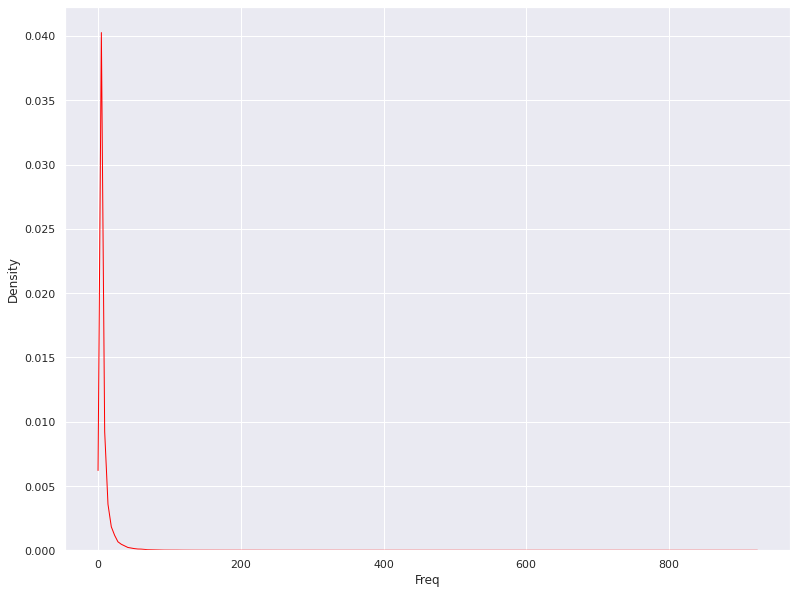

In [60]:
freq1=sns.distplot(df_final['freq'], hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
freq1.set(xlabel="Freq", ylabel = "Density")

**by this graph we get to know about that there are very much less song which has more freq**

In [61]:
print(df_final.groupby(['freq']).size())

freq
1      839135
2      213712
3       95726
4       55158
5       73542
        ...  
537         1
582         1
597         1
646         1
923         1
Length: 299, dtype: int64


In [62]:
(df_final.freq.value_counts()/len(df_final)*100).round(2)
# here 1 time listened songs contribute 57.83% of data in the whole dataset and followed by 2 times ie. of 14.73%

1      57.83
2      14.73
3       6.60
5       5.07
4       3.80
       ...  
262     0.00
187     0.00
259     0.00
189     0.00
923     0.00
Name: freq, Length: 299, dtype: float64

In [63]:
(df_final.release.value_counts()/len(df_final)*100).round(2).head(10)
# percentage of top 10 releases and their contribution in the whole dataset 

Sehr kosmisch                                                          0.35
Undo                                                                   0.31
You're The One                                                         0.29
Dog Days Are Over (Radio Edit)                                         0.26
Revelry                                                                0.25
Secrets                                                                0.24
Horn Concerto No. 4 in E flat K495: II. Romance (Andante cantabile)    0.23
Hey_ Soul Sister                                                       0.19
Fireflies                                                              0.19
Tive Sim                                                               0.18
Name: release, dtype: float64

In [64]:
(df_final.freq.value_counts()/len(df_final)*100).round(2)
# here 1 time listened songs contribute 57.83% of data in the whole dataset and followed by 2 times ie. of 14.73%

1      57.83
2      14.73
3       6.60
5       5.07
4       3.80
       ...  
262     0.00
187     0.00
259     0.00
189     0.00
923     0.00
Name: freq, Length: 299, dtype: float64

In [65]:
(df_final.song_id.value_counts()/len(df_final)*100).round(2).head(10)
# percentage of top 10 song id's and its contribution in the whole dataset 

SOFRQTD12A81C233C0    0.35
SOAUWYT12A81C206F1    0.31
SOBONKR12A58A7A7E0    0.29
SOAXGDH12A8C13F8A1    0.26
SOSXLTC12AF72A7F54    0.25
SONYKOW12AB01849C9    0.24
SOEGIYH12A6D4FC0E3    0.23
SODJWHY12A8C142CCE    0.19
SOLFXKT12AB017E3E0    0.19
SOFLJQZ12A6D4FADA6    0.18
Name: song_id, dtype: float64

In [66]:
user=df_final.groupby(['user_id']).size()
user

user_id
00007a02388c208ea7176479f6ae06f8224355b3     9
00014a76ed063e1a749171a253bca9d9a0ff1782    11
00015189668691680bb1a2e58afde1541ec92ced    17
0001ff7aa2667c8d8b945317b88adaed1c0b9dc2     9
00020fcd8b01986a6a85b896ccde6c49f35142ad    32
                                            ..
fffdef71f13352e9cff769f1d96f5ccf90f8955e     7
fffe29116f96c97b47a5dabdd406784ad0ba6f30     6
fffe5b73c50c72ca9c54947efac1fcacf59c4a17    23
fffed0bee753cd78494011b8b55dafd4f5c7e5ff    13
ffff07d7d9bb187aa58c7b81b3d3f35e7cf7c0ee    13
Length: 110000, dtype: int64

[Text(0, 0.5, 'Density'), Text(0.5, 0, 'Number of songs per user')]

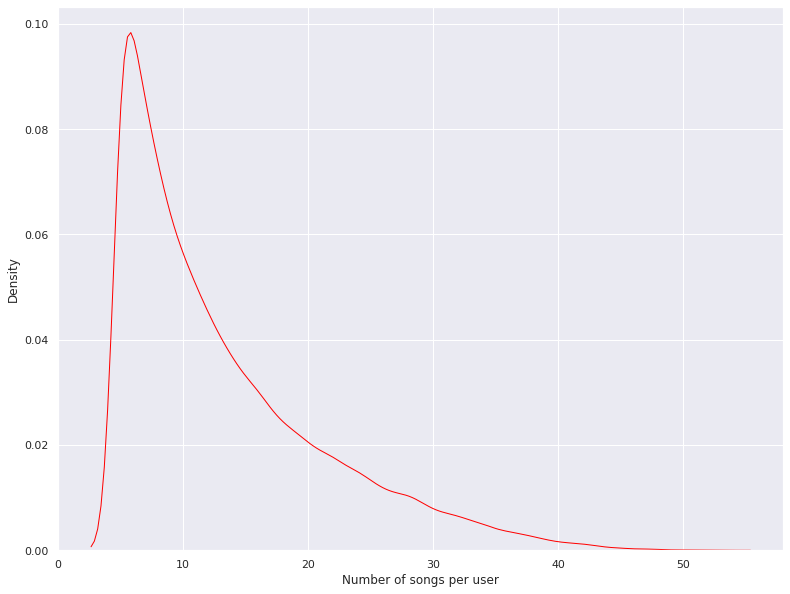

In [67]:
User1=sns.distplot(user, hist=False, kde=True, 
             bins=int(180/5), color = 'red', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 1})
User1.set(xlabel="Number of songs per user", ylabel = "Density")

In [68]:
df_final.user_id.value_counts() #this cell gives user count that how many songs particular user listened
# there is user with highest user count of 53

7d90be8dfdbde170f036ce8a4b915440137cb11c    53
d30e18323f15426c3cdc8585252ed34459916f51    52
016a24e91a72c159a5048ab1b9b2ba5ce761b526    52
2e424b28bff1f62a2dae22a918f09f9c30c06d1b    52
03ad93fdb01506ce205f4708decf8e4b1ae90fff    52
                                            ..
2d294fc6f60caece142451e62349392e2ebad358     5
f56179701297e546dfdb88033459b376639b3fb5     5
23e63ff46119de222cd67e19b70745fe9087b9fc     5
c2d5fb2863176a72f618b3ae3a59a8534e993af4     5
ac14c0996baa800c779e11130c8e81d5503ace0f     5
Name: user_id, Length: 110000, dtype: int64

In [69]:
# lets check with the highest user count
user=df_final[df_final['user_id']=='7d90be8dfdbde170f036ce8a4b915440137cb11c']
user

,user_id,song_id,freq,artist_name,release
259575,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKNWRZ12A8C13BF62,1,Postal Service,Natural Anthem (Album)
259576,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOMPGPP12A6BD55D5F,5,Nine Inch Nails,Vessel
259577,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOOVOSX12A81C22771,1,The Beginning Of The End,Funky Nassau_ Part 1 (LP Version)
259578,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOSLQGG12A6D4F5045,1,Nevermore,Matricide
259579,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTIFKV12A6D4FAD83,2,D-Flame Feat. Wayne Marshall,Call Me Crazy
259580,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOTFCUM12A6D4F7D0B,1,Remy,Intro
259581,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOECRTE12A8C14296D,1,Blue October,Blue Skies
259582,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOKXERP12A6D4F9895,1,Ana Caram,Overjoyed / Ancora
259583,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJAMRN12AB018BA2B,5,Eartha Kitt,Let's Do It_ Let's Fall In Love
259584,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOYSSSK12A8C13BC34,2,Yeasayer,Wait For The Wintertime


In [70]:
user.song_id.value_counts() # highest user had listened 53 different songs

SOMDZLO12AF729A7C1    1
SOIIUPO12A6D4F7EA8    1
SOJSQYL12A81C23901    1
SOBABRB12A6701DF4B    1
SOOCQDM12A8C140869    1
SOTIFKV12A6D4FAD83    1
SOYSSSK12A8C13BC34    1
SOACEQF12A58A7B70E    1
SOBATYS12A58A76C6E    1
SOQXDUU12A6310E836    1
SOAXJHW12A81C21E1F    1
SOZJJCY12A8C13C917    1
SOVHIIY12A58A7A606    1
SONZTEN12A8C136B8C    1
SOMHUFR12A8C14179D    1
SOGGUCU12A6D4F76C2    1
SOBYWZZ12A58A7B90E    1
SODHITM12A58A79070    1
SOOVOSX12A81C22771    1
SOGYTIV12A6D4FBF10    1
SOWZREA12A6701D93D    1
SOEXMJG12A8C13EC18    1
SOLZTYD12A8C143215    1
SOATPFD12A8C136B88    1
SOWVLZC12AB017F4FB    1
SOQDYRL12A8C13211D    1
SOVOJVL12A6D4F93C1    1
SOKNWRZ12A8C13BF62    1
SOXHIDK12A58A7CFB3    1
SOTGHQR12A8C1406C5    1
SOZJFDM12AB01807DC    1
SOQBRAQ12A58A7D473    1
SOMPGPP12A6BD55D5F    1
SOKXERP12A6D4F9895    1
SOXGIHJ12A8C13B367    1
SOHTWGE12AB0188968    1
SOJAMRN12AB018BA2B    1
SOAVGMK12A8C144BDD    1
SOYYBHE12A6BD53865    1
SOOEEPE12A8AE459A4    1
SOCXEKQ12AAF3B5490    1
SODZVMN12AC3DF81

In [71]:
user[user['freq']>3] # this cell provides information about the song id's the highest user had listened more than 3 times

,user_id,song_id,freq,artist_name,release
259576,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOMPGPP12A6BD55D5F,5,Nine Inch Nails,Vessel
259583,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJAMRN12AB018BA2B,5,Eartha Kitt,Let's Do It_ Let's Fall In Love
259590,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBHRTW12A8AE48014,5,Rolf Harris,The Court Of King Caractacus
259594,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOWVLZC12AB017F4FB,5,Insane Clown Posse,Out
259595,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBATYS12A58A76C6E,5,The Kingston Trio,Greenback Dollar
259604,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOBABRB12A6701DF4B,6,Shania Twain,Nah!
259612,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOQBRAQ12A58A7D473,5,Eels,My Beloved Monster
259614,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOXGIHJ12A8C13B367,4,Yeasayer,Final Path
259626,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOJSQYL12A81C23901,4,Onar,Xehasmeni Melodia
259627,7d90be8dfdbde170f036ce8a4b915440137cb11c,SOHTWGE12AB0188968,5,Triple Darkness,Represent


**by this graph we get to know that there are some user who listened to more than 3 songs.**

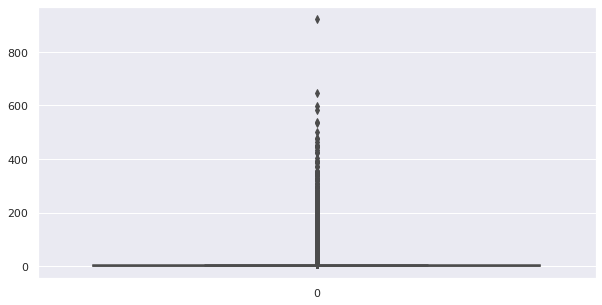

In [72]:
plt.figure(figsize=[10,5])
sns.boxplot(data=df_final.freq)

In [73]:
df_final.freq.skew()

17.24384045828895

**By seeing skew value of Freq column  the data is not normally distributed , it is highly positive skew  which means when freq value  is high then users are less  ,when freq is low then user are more**

# **1.Popularity Based Recommendation System Implementation**

In [74]:
df_final.head()

,user_id,song_id,freq,artist_name,release
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero


In [75]:
df_final.shape

(1450932, 5)

In [76]:
df_final['song'] = df_final["artist_name"] + ' - ' + df_final["release"]
song_grouped = df_final.groupby(['song']).agg({'freq': 'count'}).reset_index()
grouped_sum = song_grouped['freq'].sum()
song_grouped['percentage']  = song_grouped['freq'].div(grouped_sum)*100
song_grouped.sort_values(['freq', 'song'], ascending = [0,1])

,song,freq,percentage
59878,Harmonia - Sehr kosmisch,5043,0.347570
17175,Björk - Undo,4483,0.308974
42714,Dwight Yoakam - You're The One,4136,0.285058
51326,Florence + The Machine - Dog Days Are Over (Ra...,3780,0.260522
77664,Kings Of Leon - Revelry,3672,0.253079
...,...,...,...
162028,Ólafur Arnalds - Himininn er að hrynja_ en stj...,1,0.000069
162030,Ólafur Arnalds - Kjurrt,1,0.000069
162037,Ólafur Arnalds - Við vorum smá...,1,0.000069
162041,Órla Fallon - The Water Is Wide,1,0.000069


In [77]:
df_final.head()

,user_id,song_id,freq,artist_name,release,song
0,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOBONKR12A58A7A7E0,1,Dwight Yoakam,You're The One,Dwight Yoakam - You're The One
1,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOEGIYH12A6D4FC0E3,1,Barry Tuckwell/Academy of St Martin-in-the-Fie...,Horn Concerto No. 4 in E flat K495: II. Romanc...,Barry Tuckwell/Academy of St Martin-in-the-Fie...
2,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOFLJQZ12A6D4FADA6,1,Cartola,Tive Sim,Cartola - Tive Sim
3,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SOHTKMO12AB01843B0,1,Lonnie Gordon,Catch You Baby (Steve Pitron & Max Sanna Radio...,Lonnie Gordon - Catch You Baby (Steve Pitron &...
4,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d,SODQZCY12A6D4F9D11,1,Miguel Calo,El Cuatrero,Miguel Calo - El Cuatrero


In [78]:
import sklearn
from sklearn.model_selection import train_test_split 
# from Recommenders import Recommenders
train_data, test_data = train_test_split(df_final, test_size = 0.20, random_state=0)

In [79]:
import numpy as np

#Class for Popularity based Recommender System model
class popularity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.popularity_recommendations = None
        
    #Create the popularity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

        #Get a count of user_ids for each unique song as recommendation score
        train_data_grouped = train_data.groupby([self.item_id]).agg({self.user_id: 'count'}).reset_index()
        train_data_grouped.rename(columns = {'user_id': 'score'},inplace=True)
    
        #Sort the songs based upon recommendation score
        train_data_sort = train_data_grouped.sort_values(['score', self.item_id], ascending = [0,1])
    
        #Generate a recommendation rank based upon score
        train_data_sort['Rank'] = train_data_sort['score'].rank(ascending=0, method='first')
        
        #Get the top 10 recommendations
        self.popularity_recommendations = train_data_sort.head(10)

    #Use the popularity based recommender system model to make recommendations
    def recommend(self, user_id):    
        user_recommendations = self.popularity_recommendations
        
        #Add user_id column for which the recommendations are being generated
        user_recommendations['user_id'] = user_id
    
        #Bring user_id column to the front
        cols = user_recommendations.columns.tolist()
        cols = cols[-1:] + cols[:-1]
        user_recommendations = user_recommendations[cols]
        
        return user_recommendations

In [80]:
users = df_final['user_id'].unique()
len(users)

110000

In [81]:
pm = popularity_recommender_py()
pm.create(train_data, 'user_id', 'song')

#user the popularity model to make some prediction
user_id = users[10]
pm.recommend(user_id)

,user_id,song,score,Rank
54711,fdf6afb5daefb42774617cf223475c6013969724,Harmonia - Sehr kosmisch,4014,1.0
15734,fdf6afb5daefb42774617cf223475c6013969724,Björk - Undo,3593,2.0
39035,fdf6afb5daefb42774617cf223475c6013969724,Dwight Yoakam - You're The One,3313,3.0
46956,fdf6afb5daefb42774617cf223475c6013969724,Florence + The Machine - Dog Days Are Over (Ra...,3012,4.0
71018,fdf6afb5daefb42774617cf223475c6013969724,Kings Of Leon - Revelry,2936,5.0
95274,fdf6afb5daefb42774617cf223475c6013969724,OneRepublic - Secrets,2727,6.0
12196,fdf6afb5daefb42774617cf223475c6013969724,Barry Tuckwell/Academy of St Martin-in-the-Fie...,2624,7.0
138665,fdf6afb5daefb42774617cf223475c6013969724,Train - Hey_ Soul Sister,2241,8.0
24989,fdf6afb5daefb42774617cf223475c6013969724,Charttraxx Karaoke - Fireflies,2231,9.0
23540,fdf6afb5daefb42774617cf223475c6013969724,Cartola - Tive Sim,2160,10.0


# **2.Collaborative Based Recommender System**

**User Based Colaborative Filtering**

In [82]:
!pip install scikit-surprise

     |████████████████████████████████| 11.8MB 215kB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1617664 sha256=4dc55af4178d464070ebb9c645443e55114e8a4bf1c760e25a09e295db9b2165
  Stored in directory: /root/.cache/pip/wheels/78/9c/3d/41b419c9d2aff5b6e2b4c0fc8d25c538202834058f9ed110d0
Successfully built scikit-surprise


In [83]:
import pandas as pd
from surprise import Reader
from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise import NormalPredictor
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNWithZScore
from surprise import KNNBaseline
from surprise import SVD
from surprise import BaselineOnly
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
from surprise.accuracy import rmse
from surprise import accuracy
from surprise.model_selection import train_test_split

In [84]:
df_final = df_final[:100000]
df_final.shape

(100000, 6)

In [85]:
from surprise import Dataset
reader =Reader()
data = Dataset.load_from_df(df_final[['user_id','song_id','freq']],reader)

In [86]:
trainset, testset = train_test_split(data, test_size=0.25)

In [87]:
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': True})
algo.fit(trainset)
predictions = algo.fit(trainset).test(testset)


Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.


In [88]:
df = pd.DataFrame(predictions, columns=['uid','iid','rui','est','details'])
df['err'] = abs(df.est - df.rui)

In [89]:
best_predictions = df.sort_values(by='err')[:10]
worst_predictions = df.sort_values(by='err')[-10:]

In [90]:
best_predictions

,uid,iid,rui,est,details,err
15928,8001b820dbe3659bbf4068ff32987422ffdaec96,SORWEEW12A58A7A935,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0
17311,10b7b7faa01faf9423067311bb050cee4528342a,SORVLRC12A8151E078,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4683,a26a6f0348e0afd16e54ba25c9c2988c682fc17b,SOTVZIB12A6D4F694A,2.0,2.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4687,88229ff8f023c55b78ebbc943dfa3b1811e6a59a,SOQLIZI12A8AE471C6,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",0.0
13497,ab35eaead21afe1f495add68a8b27dcb63573640,SOYJDRA12AB017F30D,1.0,1.0,"{'actual_k': 4, 'was_impossible': False}",0.0
13484,c742ff6f6823a7e8baeb688eb9c01e6efbff8cfc,SOCKPSR12A8C136FC8,5.0,5.0,"{'actual_k': 0, 'was_impossible': False}",0.0
22263,b4d87b48fd8cf737c962832a160a4c704c471d53,SOKAZPK12A8C13F149,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",0.0
4725,9c2f0ef682ddf2188fc6734bcde997a24725e63b,SOKYVWL12A67AE0922,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",0.0
22246,23ccd187473ccd4f46be475857ba15848457d12d,SOQPCPQ12A8C143935,1.0,1.0,"{'actual_k': 0, 'was_impossible': False}",0.0
13463,10b7b7faa01faf9423067311bb050cee4528342a,SOPXKYD12A6D4FA876,1.0,1.0,"{'actual_k': 2, 'was_impossible': False}",0.0


In [91]:
worst_predictions

,uid,iid,rui,est,details,err
10796,95b77b9bccae40d78e81fb6781d34b990c2ce5bc,SODLLYS12A8C13A96B,155.0,1.000000,"{'actual_k': 6, 'was_impossible': False}",154.000000
12771,ebea4e45634a73f02e3d462d2b0a0b807967a237,SOSYLXK12A8C13F738,163.0,5.000000,"{'actual_k': 0, 'was_impossible': False}",158.000000
20760,85d5f406f90ce835cb8a3fb0086d06a7e2af291f,SOQZQTH12AB0189AB8,166.0,2.909091,"{'actual_k': 0, 'was_impossible': False}",163.090909
2217,ae016a8529578fe7f69ab98b19838e94ded02f78,SOIKQFR12A6310F2A6,180.0,5.000000,"{'actual_k': 1, 'was_impossible': False}",175.000000
9244,1b7aaf737834d88d807ac8e893ed7330645a59cf,SOTLHUV12A6D4FC541,226.0,4.261905,"{'actual_k': 2, 'was_impossible': False}",221.738095
4077,c6150292374fb1dad89982367b3245dd5004c718,SOHPOMX12A58A7D506,244.0,3.214400,"{'was_impossible': True, 'reason': 'User and/o...",240.785600
12110,730c47c0c407bfaf40cd56ffdbbf6af73cbf25ca,SOEOTVW12A8C1454C3,244.0,3.214400,"{'was_impossible': True, 'reason': 'User and/o...",240.785600
9919,9890e142264db826eda94ee0f01e7fdb63e0bf0e,SOWAWSK12A8C1383B2,245.0,3.214400,"{'was_impossible': True, 'reason': 'User and/o...",241.785600
9703,c6b540b9d5b66204857c8db79fcdcf060334484a,SOPSOHT12A67AE0235,261.0,5.000000,"{'actual_k': 0, 'was_impossible': False}",256.000000
7142,b51eeda3c09e2426f2e52dca8444a8c0cab6265a,SOEPDNA12AC3DF9820,281.0,3.214400,"{'was_impossible': True, 'reason': 'User and/o...",277.785600


# **3.Content based recommender system**

In [92]:
def combine_features(row):
    return row['user_id']+" "+row['song_id']+" "+row['artist_name']+" "+row['release']

In [93]:
df_final=df_final[:10000]

In [94]:
df_final['combine_features'] = df_final.apply(combine_features, axis=1)
df_final['combine_features'].head()

0    fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOBON...
1    fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOEGI...
2    fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOFLJ...
3    fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOHTK...
4    fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SODQZ...
Name: combine_features, dtype: object

In [95]:
df_final=df_final.drop(['user_id','release','artist_name','freq'], axis=1)
df_final

,song_id,song,combine_features
0,SOBONKR12A58A7A7E0,Dwight Yoakam - You're The One,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOBON...
1,SOEGIYH12A6D4FC0E3,Barry Tuckwell/Academy of St Martin-in-the-Fie...,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOEGI...
2,SOFLJQZ12A6D4FADA6,Cartola - Tive Sim,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOFLJ...
3,SOHTKMO12AB01843B0,Lonnie Gordon - Catch You Baby (Steve Pitron &...,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOHTK...
4,SODQZCY12A6D4F9D11,Miguel Calo - El Cuatrero,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SODQZ...
...,...,...,...
9995,SOCKSGZ12A58A7CA4B,Linkin Park - Bleed It Out [Live At Milton Key...,4e7abd655b2d28d772b20cbc912f3bdd542229d7 SOCKS...
9996,SOQLUTQ12A8AE48037,Foo Fighters - The Pretender,4e7abd655b2d28d772b20cbc912f3bdd542229d7 SOQLU...
9997,SOONKHS12AB018E4C6,Madonna - Revolver [feat. Lil Wayne],4e7abd655b2d28d772b20cbc912f3bdd542229d7 SOONK...
9998,SOUGUKH12A8C13FBB0,The Wombats - Moving To New York (album version),4e7abd655b2d28d772b20cbc912f3bdd542229d7 SOUGU...


In [96]:
df_final.set_index('song_id',inplace=True)
df_final.head()


,song,combine_features
song_id,,
SOBONKR12A58A7A7E0,Dwight Yoakam - You're The One,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOBON...
SOEGIYH12A6D4FC0E3,Barry Tuckwell/Academy of St Martin-in-the-Fie...,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOEGI...
SOFLJQZ12A6D4FADA6,Cartola - Tive Sim,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOFLJ...
SOHTKMO12AB01843B0,Lonnie Gordon - Catch You Baby (Steve Pitron &...,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SOHTK...
SODQZCY12A6D4F9D11,Miguel Calo - El Cuatrero,fd50c4007b68a3737fe052d5a4f78ce8aa117f3d SODQZ...


In [97]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [98]:
cv = CountVectorizer()

count_matrix= cv.fit_transform(df_final['combine_features'])
count_matrix

<10000x18152 sparse matrix of type '<class 'numpy.int64'>'
	with 72037 stored elements in Compressed Sparse Row format>

In [99]:
indices = pd.Series(df_final.index)
indices[:20]

0     SOBONKR12A58A7A7E0
1     SOEGIYH12A6D4FC0E3
2     SOFLJQZ12A6D4FADA6
3     SOHTKMO12AB01843B0
4     SODQZCY12A6D4F9D11
5     SOXLOQG12AF72A2D55
6     SOUVUHC12A67020E3B
7     SOUQERE12A58A75633
8     SOIPJAX12A8C141A2D
9     SOEFCDJ12AB0185FA0
10    SOATCSU12A8C13393A
11    SOZPZGN12A8C135B45
12    SOPFVWP12A6D4FC636
13    SOHEKND12A8AE481D0
14    SOPSVVG12A8C13B444
15    SODSKZZ12AB0188524
16    SONZTNP12A8C1321DF
17    SOVVLKF12A8C1424F0
18    SOMLKZO12AB017F4AE
19    SOACRJG12A8C137A8D
Name: song_id, dtype: object

In [100]:
cosine_sim = cosine_similarity(count_matrix)

In [101]:
df_sim = pd.DataFrame(cosine_sim)
df_sim.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,9960,9961,9962,9963,9964,9965,9966,9967,9968,9969,9970,9971,9972,9973,9974,9975,9976,9977,9978,9979,9980,9981,9982,9983,9984,9985,9986,9987,9988,9989,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.000000,0.138675,0.158114,0.196116,0.144338,0.125000,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.133631,0.0,0.00000,0.0,0.0,0.133631,0.133631,0.106600,0.111803,0.0,0.0,0.0,0.125000,0.0,0.0,0.0,0.0,0.133631,0.0,0.133631,0.000000,...,0.0,0.133631,0.0,0.133631,0.0,0.0,0.0,0.0,0.133631,0.0,0.0,0.00000,0.0,0.000000,0.0,0.133631,0.0,0.000000,0.0,0.0,0.000000,0.0,0.117851,0.0,0.0,0.111803,0.106600,0.117851,0.0,0.000000,0.133631,0.0,0.0,0.0,0.0,0.0,0.144338,0.0,0.111803,0.117851
1,0.138675,1.000000,0.087706,0.054393,0.080064,0.069338,0.0,0.14825,0.0,0.0,0.0,0.0,0.138675,0.0,0.0,0.0,0.0,0.0,0.0,0.074125,0.0,0.14825,0.0,0.0,0.074125,0.074125,0.059131,0.186052,0.0,0.0,0.0,0.138675,0.0,0.0,0.0,0.0,0.074125,0.0,0.074125,0.124035,...,0.0,0.222375,0.0,0.074125,0.0,0.0,0.0,0.0,0.074125,0.0,0.0,0.14825,0.0,0.080064,0.0,0.074125,0.0,0.080064,0.0,0.0,0.000000,0.0,0.130744,0.0,0.0,0.062017,0.059131,0.130744,0.0,0.069338,0.074125,0.0,0.0,0.0,0.0,0.0,0.080064,0.0,0.062017,0.000000
2,0.158114,0.087706,1.000000,0.124035,0.182574,0.158114,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.8,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
3,0.196116,0.054393,0.124035,1.000000,0.113228,0.098058,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.167248,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000
4,0.144338,0.080064,0.182574,0.113228,1.000000,0.144338,0.0,0.00000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.00000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.136083,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000


In [102]:
cosine_sim.shape

(10000, 10000)

In [103]:
def recommendations(song, cosine_sim=cosine_sim):
    recommended_song=[]
    idx= indices[indices == song ].index[0]
    score_series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top_10_indixes = list(score_series.iloc[1:11].index)
    
    for i in top_10_indixes:
        recommended_song.append(list(df_final.index)[i])
        
    return recommended_song




In [104]:
recommendations('SOVVLKF12A8C1424F0')

['SODSKZZ12AB0188524',
 'SOSOUKN12A8C13AB79',
 'SOACRJG12A8C137A8D',
 'SOUQERE12A58A75633',
 'SOIPJAX12A8C141A2D',
 'SOPSVVG12A8C13B444',
 'SOWTGDM12A8C1377D8',
 'SORALYQ12A8151BA99',
 'SORALYQ12A8151BA99',
 'SORALYQ12A8151BA99']

## Here, we have implemented few kinds of Recommendation Systems for the Music Dataset